In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("./top_5000_albums_all_time.csv")
df.head()

,Ranking,Album,Artist Name,Release Date,Genres,Descriptors,Average Rating,Number of Ratings,Number of Reviews
0,1,OK Computer,Radiohead,16-Jun-97,"Alternative Rock, Art Rock","melancholic, anxious, futuristic, alienation, ...",4.23,"70,382",1531
1,2,Wish You Were Here,Pink Floyd,12-Sep-75,"Progressive Rock, Art Rock","melancholic, atmospheric, progressive, male vo...",4.29,"48,662",983
2,3,In the Court of the Crimson King,King Crimson,10-Oct-69,"Progressive Rock, Art Rock","fantasy, epic, progressive, philosophical, com...",4.30,"44,943",870
3,4,Kid A,Radiohead,3-Oct-00,"Art Rock, Experimental Rock, Electronic","cold, melancholic, futuristic, atmospheric, an...",4.21,"58,590",734
4,5,To Pimp a Butterfly,Kendrick Lamar,15-Mar-15,"Conscious Hip Hop, West Coast Hip Hop, Jazz Rap","political, conscious, poetic, protest, concept...",4.27,"44,206",379


In [4]:
df = df.drop(columns = ['Release Date', 'Genres','Descriptors' ])
df.head()

,Ranking,Album,Artist Name,Average Rating,Number of Ratings,Number of Reviews
0,1,OK Computer,Radiohead,4.23,"70,382",1531
1,2,Wish You Were Here,Pink Floyd,4.29,"48,662",983
2,3,In the Court of the Crimson King,King Crimson,4.30,"44,943",870
3,4,Kid A,Radiohead,4.21,"58,590",734
4,5,To Pimp a Butterfly,Kendrick Lamar,4.27,"44,206",379


In [5]:
df2 = pd.read_csv("./artists.csv", sep='\t')
df2.head()


,artist_id,name,followers,popularity,artist_type,main_genre,genres,image_url
0,66CXWjxzNUsdJxJ2JdwvnR,Ariana Grande,34554242,96,singer,dance pop,"['dance pop', 'pop', 'post-teen pop']",https://i.scdn.co/image/b1dfbe843b0b9f54ab2e58...
1,26VFTg2z8YR0cCuwLzESi2,Halsey,7368242,90,singer,dance pop,"['dance pop', 'electropop', 'etherpop', 'indie...",https://i.scdn.co/image/22a5f3d8c42bc7cb55215e...
2,0Y5tJX1MQlPlqiwlOH1tJY,Travis Scott,6313709,94,rapper,pop,"['pop', 'pop rap', 'rap']",https://i.scdn.co/image/dc5eba5e032c2e5bc4d42c...
3,246dkjvS1zLTtiykXe5h60,Post Malone,16737002,96,rapper,dfw rap,"['dfw rap', 'pop', 'rap']",https://i.scdn.co/image/f9d8b742b66609f12da023...
4,1zNqQNIdeOUZHb8zbZRFMX,Swae Lee,483032,89,singer,trap music,['trap music'],https://i.scdn.co/image/a177469870b41f7e17e3b5...


In [6]:
df2 = df2.drop(columns = ['artist_id', 'artist_id', 'image_url'])
df2.head()

,name,followers,popularity,artist_type,main_genre,genres
0,Ariana Grande,34554242,96,singer,dance pop,"['dance pop', 'pop', 'post-teen pop']"
1,Halsey,7368242,90,singer,dance pop,"['dance pop', 'electropop', 'etherpop', 'indie..."
2,Travis Scott,6313709,94,rapper,pop,"['pop', 'pop rap', 'rap']"
3,Post Malone,16737002,96,rapper,dfw rap,"['dfw rap', 'pop', 'rap']"
4,Swae Lee,483032,89,singer,trap music,['trap music']


In [7]:
import matplotlib.pyplot as plt

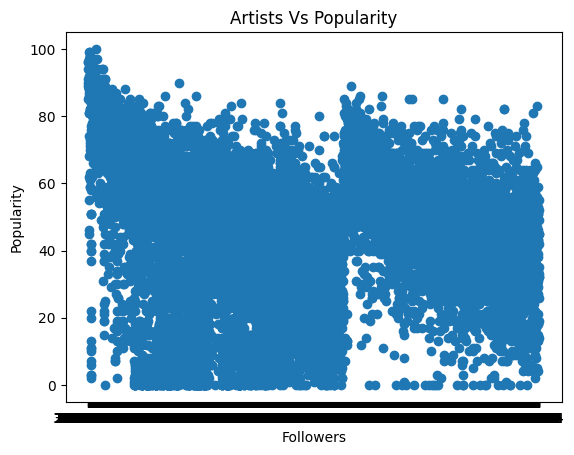

In [8]:
plt.scatter(df2['followers'], df2['popularity'])
plt.xlabel('Followers')
plt.ylabel('Popularity')
plt.title('Artists Vs Popularity')
plt.show()

In [17]:
import base64
import json
from requests import post, get

def get_token():
    auth_string = '3e18835b9b9d4add8ad12c336945b94e' + ':' + '59c275fced1a4194ae1ee5bb2e4a7d01'
    auth_bytes = auth_string.encode('utf-8')
    auth_base64 = str(base64.b64encode(auth_bytes), 'utf-8')
    url = 'https://accounts.spotify.com/api/token'
    headers = {
        "Authorization": "Basic " + auth_base64,
        "Content-Type": "application/x-www-form-urlencoded"
    }
    data = {"grant_type": "client_credentials"}
    result = post(url, headers=headers, data=data)
    json_result = json.loads(result.content)
    token = json_result["access_token"]
    return token

def get_auth_header(token):
    return {"Authorization": "Bearer " + token}

def get_album_info(token, artist_name):
    try:
        url = "https://api.spotify.com/v1/search"
        headers = get_auth_header(token)
        query = f"?q={artist_name}&type=artist&limit=1"
        query_url = url + query
        result = get(query_url, headers=headers)
        json_result = json.loads(result.content)

        print(json_result)

    except:
        print('errr')
        return None,None,None
    
token = get_token()
get_album_info(token , 'kr$na')

{'artists': {'href': 'https://api.spotify.com/v1/search?query=kr%24na&type=artist&offset=0&limit=1', 'items': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/5C1S9XwxMuuCciutwMhp5t'}, 'followers': {'href': None, 'total': 822182}, 'genres': ['desi hip hop', 'desi trap', 'hindi hip hop'], 'href': 'https://api.spotify.com/v1/artists/5C1S9XwxMuuCciutwMhp5t', 'id': '5C1S9XwxMuuCciutwMhp5t', 'images': [{'height': 640, 'url': 'https://i.scdn.co/image/ab6761610000e5ebdebeea13700496b7d2b345d9', 'width': 640}, {'height': 320, 'url': 'https://i.scdn.co/image/ab67616100005174debeea13700496b7d2b345d9', 'width': 320}, {'height': 160, 'url': 'https://i.scdn.co/image/ab6761610000f178debeea13700496b7d2b345d9', 'width': 160}], 'name': 'KR$NA', 'popularity': 61, 'type': 'artist', 'uri': 'spotify:artist:5C1S9XwxMuuCciutwMhp5t'}], 'limit': 1, 'next': None, 'offset': 0, 'previous': None, 'total': 1}}
